In [1]:
######################################################################################
########################### Conditional probability   #################################
######################################################################################

# Conditional probability changes when probabilibity of an event is computed with different given conditions
import enum, random

# An Enum is a typed set of enumerated values. We can use them to make more desciptive and readable code
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1
    
def random_kid()-> Kid:
    return random.choice([Kid.BOY,Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(1000):
    younger = random_kid()
    older = random_kid()
    
    if older == Kid.GIRL:
        older_girl+=1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls+=1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl+=1
        
print("P(both | older):", both_girls/older_girl)
print("P(both | either):", both_girls/either_girl)

P(both | older): 0.4949290060851927
P(both | either): 0.32232496697490093


In [2]:
######################################################################################
######### Probability density function (pdf) of a uniform distribution################
######################################################################################

def uniform_pdf(x:float) -> float:
    return 1 if 0<=x<1 else 0

def uniform_cdf(x:float)-> float:
    if x<0: return 0 #Uniform random is never <0
    elif x<1: return x #e.g P(x<=0.4) = 0.4
    else: return 1 #Uniform random is always <=1
    

In [3]:
# Plot uniform pdf
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-1,2,30)
y=[]

for xi in x:
    y.append(uniform_pdf(xi))

#Uniform pdf
plt.figure()
plt.plot(x,y)

# Plotting uniform cdf
y = []

for xi in x:
    y.append(uniform_cdf(xi))

plt.plot(x,y)
plt.legend(('Uniform pdf', 'Uniform cdf'))


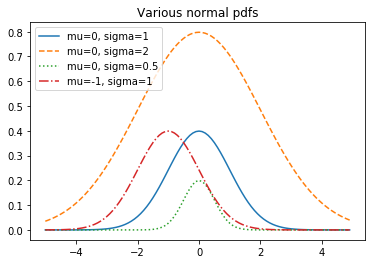

In [4]:
######################################################################################
#################################### Normal distribution##############################
######################################################################################

import math
SQRT_TWO_PI = math.sqrt(2*math.pi)

def normal_pdf(x:float, mu:float=0,sigma:float=1)-> float:
    return(math.exp(-(x-mu)**2/2/sigma**2)/SQRT_TWO_PI*sigma)

import matplotlib.pyplot as plt
xs = [x/10 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=1)for x in xs],'-',label = 'mu=0, sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2)for x in xs],'--',label = 'mu=0, sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5)for x in xs],':',label = 'mu=0, sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1)for x in xs],'-.',label = 'mu=-1, sigma=1')
plt.legend()
plt.title("Various normal pdfs")
plt.show()

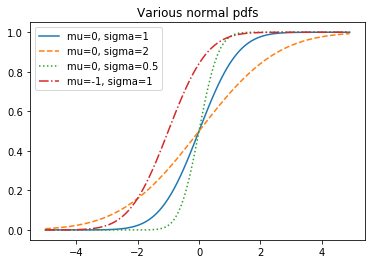

In [5]:
# Normal Cumulative distribution function
def normal_cdf(x:float, mu:float=0,sigma:float=1)-> float:
    return (1+math.erf((x-mu)/math.sqrt(2)/sigma))/2

xs = [x/10 for x in range(-50,50)]
plt.plot(xs,[normal_cdf(x,sigma=1)for x in xs],'-',label = 'mu=0, sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2)for x in xs],'--',label = 'mu=0, sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5)for x in xs],':',label = 'mu=0, sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1)for x in xs],'-.',label = 'mu=-1, sigma=1')
plt.legend()
plt.title("Various normal pdfs")
plt.show()

In [6]:
#Inverse of a normal distribution
# Returns the z for which P(Z<=z) = p
def inverse_normal_cdf(p:float,mu:float=0,sigma:float = 1,tolerance:float=0.00001)-> float:
    if mu!=0 or sigma!=1:
        return mu+sigma*inverse_normal_cdf(p,tolerance=tolerance)
    low_z = -10.0
    hi_z = 10.0
    while hi_z - low_z > tolerance:
        mid_z = (hi_z + low_z)/2
        mid_p = normal_cdf(mid_z)
        if mid_p<p:
            low_z = mid_z 
        else:
            hi_z = mid_z
    return mid_z

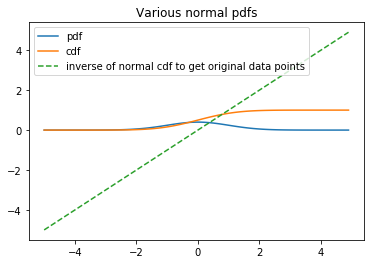

In [7]:
xs = [x/10 for x in range(-50,50)]
cdf_xs = [normal_cdf(x,sigma=1)for x in xs]
inverse = [inverse_normal_cdf(x,sigma=1) for x in cdf_xs]

plt.plot(xs,[normal_pdf(x,sigma=1)for x in xs],'-',label = 'pdf')
plt.plot(xs,cdf_xs,'-',label = 'cdf')
plt.plot(xs,inverse,'--',label = 'inverse of normal cdf to get original data points')
plt.legend()
plt.title("Various normal pdfs")
plt.show()

In [8]:
######################################################################################
#################################  Binomial histogram ################################
######################################################################################

def bernoulli_trial(p:float)-> int:
    # Returns 1 with probability p and 0 with probability 1-p
    return 1 if random.random()<p else 0

def binomial(n:int, p:float)-> int:
    # Return sum of n bernoulli(p) trials
    return sum(bernoulli_trial(p) for _ in range(n))

In [9]:
from collections import Counter
    
def binomial_histogram(p:float, n:int, num_points: int)-> None:
    #Picks points from a Binomial(n,p) and plots their histogram
    data = [binomial(n,p) for _ in range(num_points)]
    
    #Use a bar chart to show actual binomial samples
    histogram = Counter(data)
    
    plt.bar([x-0.4 for x in histogram.keys()],
            [v/num_points for v in histogram.values()],
            0.8,
            color = '0.75')
    
    mu = p*n
    sigma = math.sqrt(n*p*(1-p))
    
    #Use a line chart to show the normal approximation
    xs = range(min(data),max(data)+1)
    ys = [normal_cdf(i+0.5,mu,sigma)-normal_cdf(i-0.5,mu,sigma)
         for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial distribution vs. Normal Approximation")
    plt.show()

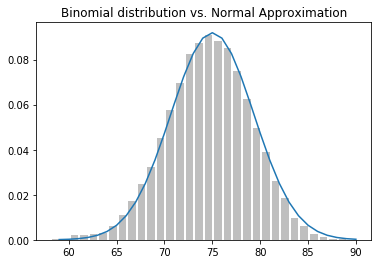

In [10]:
binomial_histogram(0.75,100,10000)